In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy_nn as nn

In [19]:
dataset = sns.load_dataset("iris")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
train_data, val_data, test_data = np.split(dataset.sample(frac=1, random_state=42), [int(.6 * len(dataset)), int(.8 * len(dataset))])
print(f'Training set size: {len(train_data)}')
print(f'Validation set size: {len(val_data)}')
print(f'Test set size: {len(test_data)}')

Training set size: 90
Validation set size: 30
Test set size: 30


In [21]:
TARGET_NAME = "species"
NUM_VARIABLES = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [22]:
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [23]:
val_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
120,6.9,3.2,5.7,2.3,virginica
83,6.0,2.7,5.1,1.6,versicolor
134,6.1,2.6,5.6,1.4,virginica
135,7.7,3.0,6.1,2.3,virginica


In [24]:
test_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
91,6.1,3.0,4.6,1.4,versicolor
41,4.5,2.3,1.3,0.3,setosa
58,6.6,2.9,4.6,1.3,versicolor
90,5.5,2.6,4.4,1.2,versicolor
48,5.3,3.7,1.5,0.2,setosa


In [25]:
train_ds = nn.data.Dataset(train_data, TARGET_NAME, [], NUM_VARIABLES, True)
val_ds = nn.data.Dataset(val_data, TARGET_NAME, [], NUM_VARIABLES, True)
test_ds = nn.data.Dataset(test_data, TARGET_NAME, [], NUM_VARIABLES, True)

In [26]:
model = nn.models.Sequential([
    nn.layers.core.Input((1, train_ds.num_of_features())),
    nn.layers.core.Dense(30, activation='relu'),
    nn.layers.core.Dense(3, activation='softmax')
])

In [27]:
model.compile(optimizer=nn.optimizers.SGD(lr=0.01, momentum=0.1),
              loss=nn.losses.CategoricalCrossEntropy(),
              metrics=['accuracy', 'val_accuracy'])

In [28]:
train_ds.batch(16)
val_ds.batch(16)

In [29]:
history = model.fit(train_data=train_ds, validation_data=val_ds, epochs=250)

Epoch 1/250:
0.013s - accuracy: 0.296 - val_accuracy: 0.402 - loss: 1.110 - val_loss: 1.075
Epoch 2/250:
0.004s - accuracy: 0.296 - val_accuracy: 0.388 - loss: 1.095 - val_loss: 1.068
Epoch 3/250:
0.004s - accuracy: 0.290 - val_accuracy: 0.527 - loss: 1.079 - val_loss: 1.051
Epoch 4/250:
0.004s - accuracy: 0.471 - val_accuracy: 0.661 - loss: 1.063 - val_loss: 1.040
Epoch 5/250:
0.011s - accuracy: 0.648 - val_accuracy: 0.679 - loss: 1.047 - val_loss: 1.019
Epoch 6/250:
0.004s - accuracy: 0.679 - val_accuracy: 0.670 - loss: 1.033 - val_loss: 1.010
Epoch 7/250:
0.005s - accuracy: 0.679 - val_accuracy: 0.674 - loss: 1.017 - val_loss: 0.996
Epoch 8/250:
0.008s - accuracy: 0.685 - val_accuracy: 0.665 - loss: 1.000 - val_loss: 0.988
Epoch 9/250:
0.003s - accuracy: 0.685 - val_accuracy: 0.665 - loss: 0.986 - val_loss: 0.975
Epoch 10/250:
0.001s - accuracy: 0.692 - val_accuracy: 0.656 - loss: 0.971 - val_loss: 0.968
Epoch 11/250:
0.001s - accuracy: 0.660 - val_accuracy: 0.683 - loss: 0.970 - va

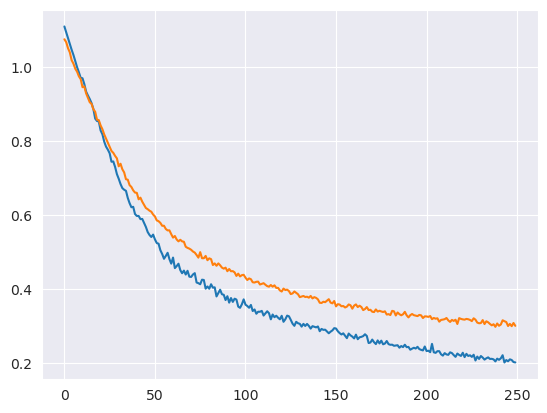

In [30]:
plt.plot(history.epochs, history.history['loss'], history.history["val_loss"])

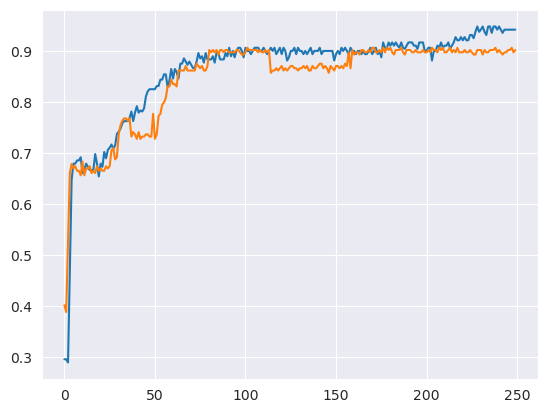

In [31]:
plt.plot(history.epochs, history.history['accuracy'], history.history['val_accuracy'])

In [32]:
y_pred = model.predict(test_ds.dataset.T)
y_true = test_ds.target.T
accuracy = nn.accuracy(y_true, y_pred)

print(f'Test set accuracy: {accuracy:.0%}')

Test set accuracy: 90%
